---

_You are currently looking at **version 1.5** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Assignment 3 - More Pandas
This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

### Question 1 (20%)
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*

In [2]:
import numpy as np
import pandas as pd

def clean_and_merge():
  
    pd.set_option("display.max_rows",None)
    pd.set_option("display.max_columns",None)
    
    columns = ['Country', 'Energy Supply', 
               'Energy Supply per Capita', '% Renewable'] 
    
    energy = pd.read_excel("Energy+Indicators.xls", 
                           header = None, 
                           skipfooter = 38, 
                           skiprows = 18, 
                           usecols = [x + 2 for x in range(4)], 
                           names = columns)
    #load in energy dataset, name the columns
    
    energy["Country"].replace({"\d+":"", " \(.*\)":""}, regex = True, inplace = True)
    #remove digits, remove parentheses and anything inside
    
    energy["Country"].replace({"Republic of Korea": "South Korea",
                               "United States of America": "United States",
                               "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                               "China, Hong Kong Special Administrative Region": "Hong Kong"},
                              regex = True, 
                              inplace = True)
    #rename countries so they match other datasets
    
    energy.replace("[...]",np.NaN, regex = True, inplace = True)
    #replace elipses with Nan
    
    energy["Energy Supply"] *= 1000000
    #convert to gigajoules
   
    GDP = pd.read_csv("world_bank.csv", header = 1, skiprows = 3)
    #load in the GDP dataset
    
    GDP.replace({"Korea, Rep.":"South Korea",
                 "Iran, Islamic Rep.":"Iran",
                 "Hong Kong SAR, China":"Honk Kong"}, 
                regex = True, 
                inplace = True)
    #rename countries so they match other datasets
  
    GDP.drop(GDP.columns[1:50], axis = 1, inplace = True)
    #drop gdp data prior to 2006
    
    GDP.rename(columns = {"Country Name":"Country"}, inplace = True)
    #rename column for join
    
    ScimEn = pd.read_excel("scimagojr-3.xlsx")
    #load Scimenergy dataset
    
    ScimEnergy = ScimEn.merge(energy, on = "Country")
    #inner join ScimEn with energy on "Country", create new combined dataframe "ScimEnergy"
    
    ScimEnergyGDP = (ScimEnergy.merge(GDP, on = "Country")
                     .sort_values(by=["Rank"], ascending = True))
    #inner join ScimEnergy with GDP on "Country", sort values by Rank
    
    return ScimEnergyGDP, ScimEn, energy, GDP
    
def answer_one():
    
    ScimEnergyGDP = clean_and_merge()[0]
    #grab cleaned and merged census 
    
    answer = ScimEnergyGDP.loc[0:14]
    #create a slice of ScimEnergy DataFrame, returning the first 15 rows
    
    answer.set_index(keys = "Country", inplace = True) 
    #set index as Country
    
    return answer
answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [45]:
import numpy as np
import pandas as pd

def answer_two():
    
    ScimEnergyGDP, ScimEn, energy, GDP = clean_and_merge()
           
    ScimEn = pd.read_excel("scimagojr-3.xlsx")
                 
    D = pd.merge(ScimEn, energy, on = "Country")
    #inner join ScimEn and energy on "Country"
    D1 = pd.merge(GDP, D, on = "Country")
    #inner join GDP and D on "Country"
    
    E = pd.merge(ScimEn, energy, on = "Country", how = "outer")
    #full outer join ScimEn and energy on "Country"
    E1 = pd.merge(GDP, E, on = "Country", how = "outer")
    #full outer join GDP and E on Country
   
    answer = len(E1)-len(D1)
    #return the difference in length of a full outer join vs inner join of the 3 tables. 158 records lost
        
    return answer

answer_two()

158

## Answer the following questions in the context of only the top 15 countries by Scimagojr Rank (aka the DataFrame returned by `answer_one()`)

### Question 3 (6.6%)
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [22]:
import numpy as np

def answer_three():
    
    df = answer_one()
    #load in top 15 countries
    
    df["avgGDP"] = df.loc[:,"2006":"2015"].apply(np.mean,axis = 1)
    #create a new column with the average gdp 2006-2015 for each row
    
    answer = df["avgGDP"].sort_values(ascending = False)
    #sort the values in descending order
    
    return answer

answer_three()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [23]:
def answer_four():
    
    df = answer_one()
    #load in top 15 countries
    
    avgGDP = answer_three().sort_values(ascending = False)
    #load in the average gdp 2006-2015

    rank6GDP_index = avgGDP.index[5]
    #return index of 6th largest average GDP
    
    answer = (df.loc[rank6GDP_index,"2015"] 
              -df.loc[rank6GDP_index,"2006"])
    #return difference of 2015 and 2006 GDP
    
    return answer

answer_four()

246702696075.3999

### Question 5 (6.6%)
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [24]:
import numpy as np

def answer_five():
    
    df = answer_one()
    #load in top 15 countries
    
    energypc = df["Energy Supply per Capita"]
    #create series named Energypc
    
    answer = energypc.mean()
    #use pandas series method to calculate the mean of energypc
        
    return answer
answer_five()

157.6

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [25]:
def answer_six():
    
    df = answer_one()
    #load in top 15 countries
    
    index = df["% Renewable"].idxmax()
    #return index of the country with the highest % Renewable, replaced argmax() with idxmax()

    max_renewable = df.loc[index,"% Renewable"]
    #return the value of the highest % Renewable
        
    answer = (index, max_renewable)
    
    return answer
answer_six()

('Brazil', 69.64803)

### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [30]:
def answer_seven():
    
    df = answer_one()
    #load in top 15 countries
    
    df["self_citation_ratio"] = df["Self-citations"] / df["Citations"]
    #create new column with ratio of self-citations over total citations

    index = df["self_citation_ratio"].idxmax()
    #return index of highest self_citation_ratio
    
    value = df.loc[index,"self_citation_ratio"]
    #return value of highest self_citation_ratio
    
    answer = (index, value)
        
    return answer
answer_seven()

('China', 0.6893126179389422)

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [31]:
def answer_eight():
    
    df = answer_one()
    #load in top 15 countries
    
    df["Population Estimate"] = df["Energy Supply"] / df["Energy Supply per Capita"]
    #Population Estimate = Energy Supply * (Population/ Energy Supply). Energy Supply cancels.
    
    Pop_estimate = df["Population Estimate"].sort_values(ascending = False)
    #create new series with values sorted in descending order
    
    answer = Pop_estimate.index[2]
    #return country with the 3rd highest population estimate
    
    return answer

answer_eight()

'United States'

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

<IPython.core.display.Javascript object>


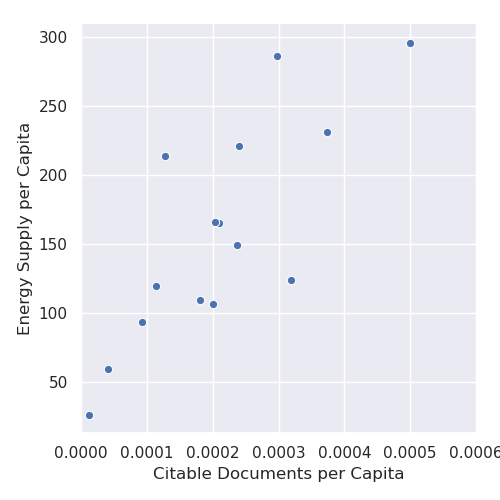

0.7940010435442943

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

def answer_nine():
       
    df = answer_one()
    #load in top 15 countries
        
    df["Population Estimate"] = df["Energy Supply"] / df["Energy Supply per Capita"]
    #Population Estimate = Energy Supply * (Population/ Energy Supply). Energy Supply cancels.    
    
    df["Citable Documents per Capita"] = df["Citable documents"] / df["Population Estimate"]
    #Create new column Citable documents per capita using estimated population    
    
    corr = df[["Citable Documents per Capita","Energy Supply per Capita"]].corr(method = "pearson").iloc[0,1]
    
    visualize_answer_nine()
        
    return corr

def visualize_answer_nine():
    
    df = answer_one()
    #load in top 15 countries
        
    df["Population Estimate"] = df["Energy Supply"] / df["Energy Supply per Capita"]
    #Population Estimate = Energy Supply * (Population/ Energy Supply). Energy Supply cancels.    
    
    df["Citable Documents per Capita"] = df["Citable documents"] / df["Population Estimate"]
    #Create new column Citable documents per capita using estimated population 
    
#     fig, ax = plt.subplots(1,1, figsize=(9,5))
#     ax.scatter(df["Citable Documents per Capita"],
#                df["Energy Supply per Capita"], color = "tab:blue")
#     ax.set_xlabel("Citable Documents per Capita")
#     ax.set_ylabel("Energy Supply per Capita")
#     ax.set_xlim(0,0.0006)
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     #make the graph pretty, zoom in on x-axis
    
    sns.set()
    g = sns.relplot("Citable Documents per Capita","Energy Supply per Capita",
                    data = df)
    g.set(xlim =(0,0.0006))
    # try using seaborn instead of matplotlib. Fewer lines for seaborn visualization
    
answer_nine()

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [34]:
import pandas as pd

def median_comparison():

    df = answer_one()
    #load in top 15 countries    
            
    Percent_renewable_indicator = pd.Series([1 if (df["% Renewable"][i] >= df["% Renewable"].median()) 
                      else 0 
                      for i in range(len(df["% Renewable"]))])
    
    #use list comprehension to create dummy variable column
    
#     Percent_renewable_indicator = pd.Series(x for x in range(len(Percent_renewable)))    
#     for i in range(len(Percent_renewable)):
#         if Percent_renewable.iloc[i] >= Percent_renewable.median():
#             Percent_renewable_indicator.iloc[i] = 1
#         else:
#             Percent_renewable_indicator.iloc[i] = 0
#     use list comprehension instead
                        
    return Percent_renewable_indicator

def answer_ten():
    
    df = answer_one()
    #load in top 15 countries    
    
    Percent_renewable_indicator = median_comparison()
    #load in dummy variable from above

    HighRenew = pd.Series(Percent_renewable_indicator.values, index = df.index)
    #create new series using values from dummy variable, set index using dataframe index    
                    
    return HighRenew

answer_ten()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
dtype: int64

### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [43]:
import pandas as pd

def answer_eleven():

    df = answer_one()
    #load in top 15 countries   
    
    df["Population Estimate"] = df["Energy Supply"] / df["Energy Supply per Capita"]
    #Population Estimate = Energy Supply * (Population/ Energy Supply). Energy Supply cancels.   
    
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
        
    df["Continent"] = df.index.map(ContinentDict)
    #create a new df column using Continent Dict to map country names to continents
    
    answer = df.groupby("Continent").agg({"Population Estimate" : ["size","sum","mean","std"]})
    #group by continents and return the population estimate count/size, sum, mean, and std

    answer.columns = answer.columns.droplevel(0)
    #drop a level from the index for auto-grader
        
    return answer

answer_eleven()


,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [84]:
import pandas as pd

def answer_twelve():

    df = answer_one()
    #load in top 15 countries   
    
    df["Population Estimate"] = df["Energy Supply"] / df["Energy Supply per Capita"]
    #Population Estimate = Energy Supply * (Population/ Energy Supply). Energy Supply cancels.   
    
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
        
    df["Continent"] = df.index.map(ContinentDict)
    #create a new df column using Continent Dict to map country names to continents
    
    df["% Renewable Bins"] = pd.cut(df["% Renewable"], 5)
    #create series with corresponding bin for each value of % renewable
    
    answer = df.groupby(["Continent","% Renewable Bins"]).agg("size")
    #group by continent and bin, calculate and return counts
    
    return answer

answer_twelve()

Continent      % Renewable Bins
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
dtype: int64

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [65]:
def answer_thirteen():
    df = answer_one()
    #load in top 15 countries   
    
    df["Population Estimate"] = df["Energy Supply"] / df["Energy Supply per Capita"]
     #Population Estimate = Energy Supply * (Population/ Energy Supply). Energy Supply cancels. 
        
    df["Population Estimate"] = df["Population Estimate"].map("{:,}".format)
    #add thousands separator to population estimate using map and format
    
    PopEst = df["Population Estimate"]
    #return the formatted series
    
    return PopEst

answer_thirteen()

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: Population Estimate, dtype: object

### Optional

Use the built in function `plot_optional()` to see an example visualization.